In [23]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from fbprophet.diagnostics import cross_validation, performance_metrics

In [24]:
# Load the preprocessed data
df = pd.read_csv('ett.csv', parse_dates=['date'])

# Prepare data for Prophet (requires 'ds' and 'y' columns)
prophet_data = df[['date', 'OT']].rename(columns={'date': 'ds', 'OT': 'y'})

In [25]:
# Add additional regressors
prophet_data['HUFL'] = df['HUFL']
prophet_data['HULL'] = df['HULL']
prophet_data['MUFL'] = df['MUFL']
prophet_data['MULL'] = df['MULL']
prophet_data['LUFL'] = df['LUFL']
prophet_data['LULL'] = df['LULL']

In [26]:
# Split the data into train and test sets
train_size = int(len(prophet_data) * 0.8)
train = prophet_data[:train_size]
test = prophet_data[train_size:]

In [27]:
# Create and fit Prophet model with additional regressors
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    changepoint_prior_scale=0.05,
    seasonality_prior_scale=10,
)
for column in ['HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL']:
    model.add_regressor(column)

model.fit(train)


In [28]:
# Make predictions
future = test[['ds', 'HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL']]
forecast = model.predict(future)

In [29]:
# Extract predictions for the test period
predictions = forecast['yhat']

In [30]:
# Evaluate the model
mse = mean_squared_error(test['y'], predictions)
mae = mean_absolute_error(test['y'], predictions)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 12.660990613615395
Mean Absolute Error: 2.8735821020406127
Root Mean Squared Error: 3.558228578044895


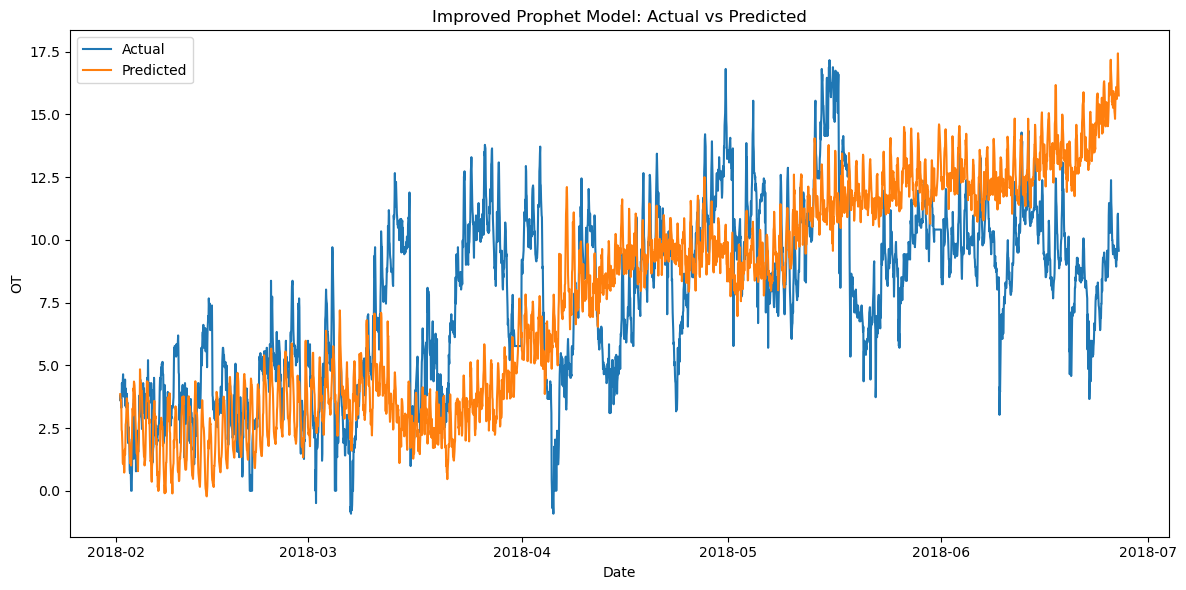

In [31]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(test['ds'], test['y'], label='Actual')
plt.plot(test['ds'], predictions, label='Predicted')
plt.title('Improved Prophet Model: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('OT')
plt.legend()
plt.tight_layout()
plt.show()

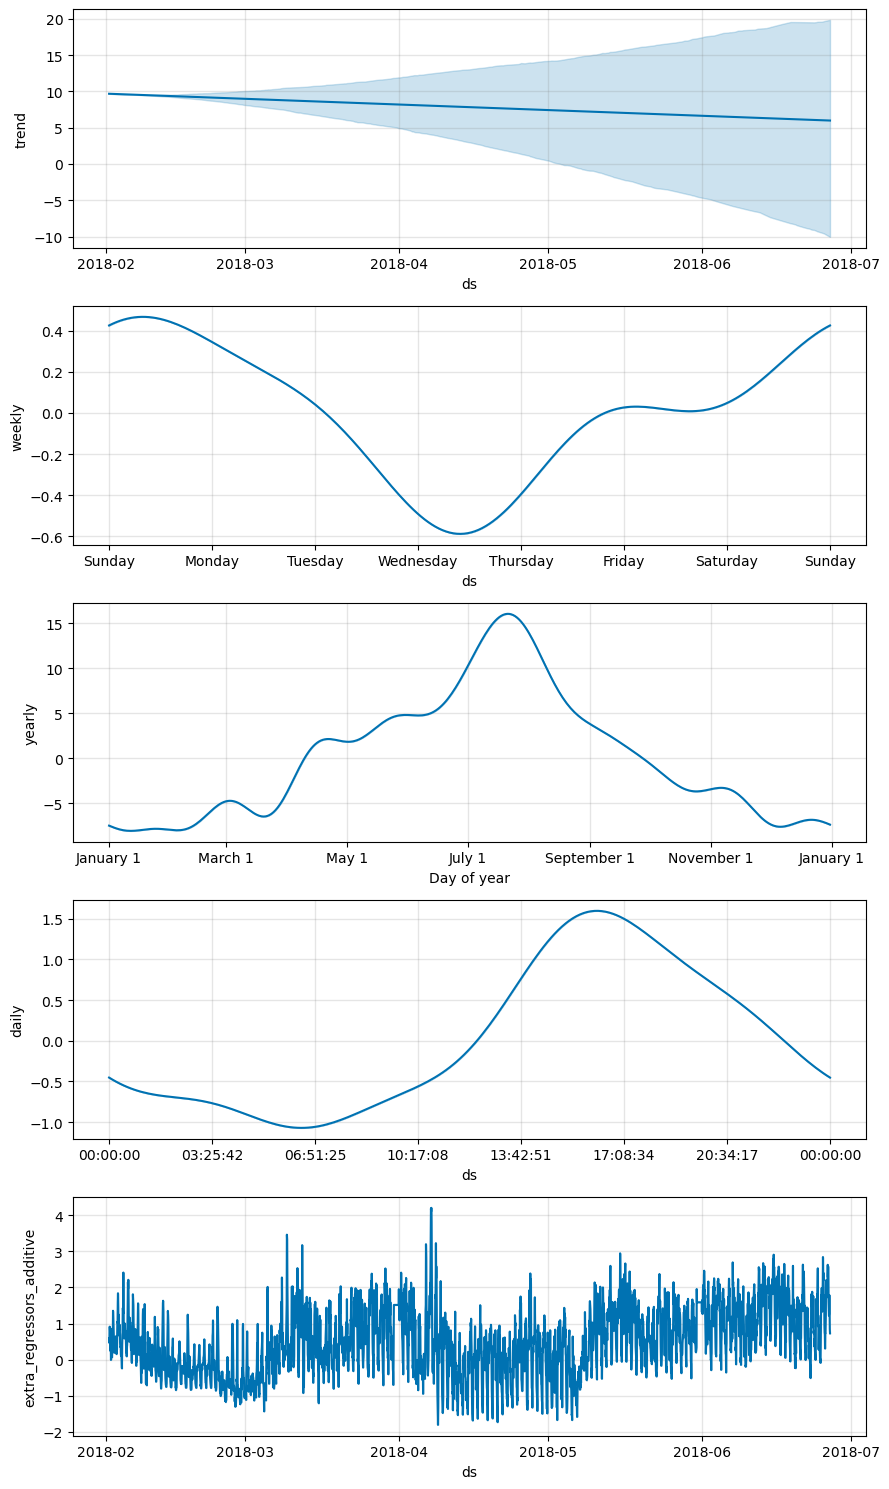

In [32]:
# Plot Prophet's components
model.plot_components(forecast)
plt.tight_layout()
plt.show()

In [35]:
# Perform cross-validation
cv_results = cross_validation(model, initial='0 days', period='180 days', horizon='365 days')
cv_performance = performance_metrics(cv_results)
print("\nCross-validation performance:")
print(cv_performance)

INFO:fbprophet:Making 2 forecasts with cutoffs between 2016-08-05 15:00:00 and 2017-02-01 15:00:00
100%|██████████| 2/2 [00:25<00:00, 12.98s/it]
INFO:fbprophet:Skipping MAPE because y close to 0



Cross-validation performance:
               horizon           mse        rmse         mae      mdape  \
0     36 days 12:00:00   2987.639298   54.659302   43.805729   3.005815   
1     36 days 13:00:00   2993.581595   54.713633   43.881626   3.009507   
2     36 days 14:00:00   2999.294896   54.765819   43.956261   3.014100   
3     36 days 15:00:00   3005.045040   54.818291   44.030834   3.018745   
4     36 days 16:00:00   3010.694635   54.869797   44.104196   3.026827   
...                ...           ...         ...         ...        ...   
7880 364 days 20:00:00  52754.680920  229.683872  178.885631  14.751669   
7881 364 days 21:00:00  52763.824407  229.703775  178.904050  14.758916   
7882 364 days 22:00:00  52772.998157  229.723743  178.920425  14.771792   
7883 364 days 23:00:00  52782.513836  229.744453  178.939738  14.782382   
7884 365 days 00:00:00  52790.965660  229.762847  178.954506  14.782382   

      coverage  
0     0.057078  
1     0.056507  
2     0.055365  


In [ ]:
# Plot cross-validation results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
cv_results.plot(x='ds', y='y', ax=ax, label='Actual')
cv_results.plot(x='ds', y='yhat', ax=ax, label='Predicted')
plt.title('Prophet Model: Cross-validation Results')
plt.xlabel('Date')
plt.ylabel('OT')
plt.legend()
plt.tight_layout()
plt.show()